In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
data = pd.read_csv("data/OnlineRetail_Train.csv", sep=",", encoding="ISO-8859-1", header=0)

# Chuyển đổi cột ngày tháng thành datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Tính toán số ngày từ ngày hóa đơn đầu tiên (cột InvoiceDate)
data['DaysSinceInvoice'] = (data['InvoiceDate'] - data['InvoiceDate'].min()).dt.days

# Lọc dữ liệu: chỉ giữ các cột quan trọng
data = data[['CustomerID', 'Quantity', 'UnitPrice', 'DaysSinceInvoice']]

# Loại bỏ các giá trị thiếu (NaN)
data.dropna(inplace=True)

# Tính giá trị (Monetary) của mỗi giao dịch
data['Monetary'] = data['Quantity'] * data['UnitPrice']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Quantity', 'UnitPrice', 'DaysSinceInvoice', 'Monetary']])
print(data_scaled[:5])


[[-2.43726274e-02 -1.31352523e-02 -1.95948316e+00 -1.19316159e-02]
 [-2.43726274e-02 -1.01667663e-03 -1.95948316e+00 -1.44656592e-04]
 [-1.63305857e-02 -1.02498771e-02 -1.95948316e+00  3.73755621e-03]
 [-2.43726274e-02 -1.01667663e-03 -1.95948316e+00 -1.44656592e-04]
 [-2.43726274e-02 -1.01667663e-03 -1.95948316e+00 -1.44656592e-04]]


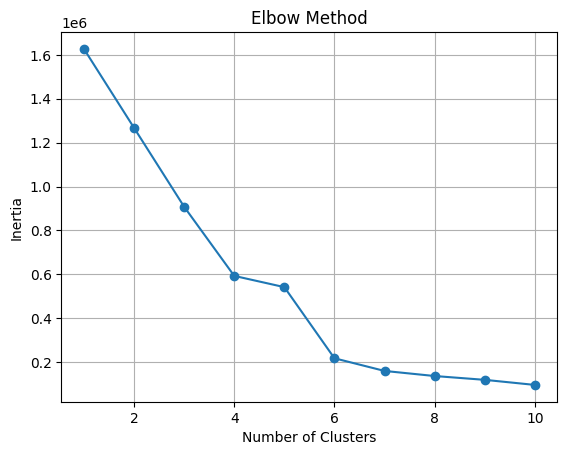

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

silhouette_scores = []

for k in range(2, 11): 
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Silhouette score for {k} clusters: {score}')

# Vẽ đồ thị Silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

2


KeyboardInterrupt: 

In [15]:
k_range = range(2, 11)  # Giá trị k cần thử nghiệm
silhouette_scores = calculate_silhouette_scores(data_scaled, k_range)

# Tìm số cụm tối ưu dựa trên Silhouette Scores
optimal_k = k_range[np.argmax(silhouette_scores)]  # Lấy k tương ứng với Silhouette Score cao nhất

# Khởi tạo KMeans với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Lấy nhãn phân nhóm của từng khách hàng
data['Cluster_Id'] = kmeans.labels_

# In kết quả phân nhóm
print(data[['CustomerID', 'Cluster_Id']].head())


KeyboardInterrupt: 